In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import pandas as pd
from src import ComputationalHypergraphDiscovery as CHD
from src.ComputationalHypergraphDiscovery.Modes import LinearMode, QuadraticMode, GaussianMode
import matplotlib.pyplot as plt
import networkx as nx

# Study all available data

In [4]:
df=pd.read_csv("france_covid_data.csv")
df=df.drop("date",axis=1)
df

,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,...,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,589.0,272296.0,24620.0,107.0,42622.0,2650.0,2.0,2.0,2.0,4.0,...,2556944.0,43551.0,25148369.0,34726580.0,609.0,609.0,55.0,55.0,664.0,664.0
1,1217.0,273513.0,24645.0,229.0,42851.0,2694.0,2.0,2.0,2.0,4.0,...,2559904.0,43914.0,25339091.0,35124318.0,683.0,1292.0,42.0,97.0,725.0,1389.0
2,1627.0,275140.0,24743.0,251.0,43102.0,2666.0,2.0,2.0,2.0,4.0,...,2571299.0,44298.0,25530897.0,35490439.0,384.0,1676.0,19.0,116.0,403.0,1792.0
3,1404.0,276544.0,24560.0,209.0,43311.0,2652.0,2.0,2.0,2.0,4.0,...,2597756.0,44601.0,25723942.0,35889993.0,443.0,2119.0,18.0,134.0,461.0,2253.0
4,1317.0,277861.0,24407.0,177.0,43488.0,2625.0,2.0,2.0,2.0,4.0,...,2617683.0,44852.0,25918163.0,36227201.0,440.0,2559.0,23.0,157.0,463.0,2716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,756.0,822964.0,19272.0,77.0,136447.0,1233.0,0.0,1.0,0.0,0.0,...,3558022.0,147257.0,231965820.0,272612209.0,1957.0,54446241.0,2027.0,53539427.0,3984.0,107985668.0
503,387.0,823351.0,18901.0,42.0,136489.0,1213.0,0.0,1.0,0.0,0.0,...,3558022.0,147331.0,232619554.0,272775929.0,1143.0,54447384.0,1169.0,53540596.0,2312.0,107987980.0
504,145.0,823496.0,18935.0,13.0,136502.0,1214.0,0.0,1.0,0.0,0.0,...,3558022.0,147352.0,233273381.0,272775929.0,280.0,54447664.0,279.0,53540875.0,559.0,107988539.0
505,900.0,824396.0,18742.0,94.0,136596.0,1199.0,0.0,1.0,0.0,0.0,...,3558022.0,147478.0,233928156.0,272775929.0,1178.0,54448842.0,1206.0,53542081.0,2384.0,107990923.0


In [5]:
kernels=[0.1*LinearMode(),0.01*QuadraticMode()]
graph_discovery=CHD.GraphDiscovery.from_dataframe(df,normalize=True,kernels=kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 29/29 [00:06<00:00,  4.29it/s]



Results for new_hospitalized_patients
Kernel [linear] has n/(n+s)=0.4857817284126693, Z=(0.99, 1.00), gamma=2.19e+01
Kernel [quadratic] has n/(n+s)=0.5351809500721796, Z=(0.96, 0.98), gamma=1.23e+00
new_hospitalized_patients has ancestors with the kernel [linear] | (n/(s+n)=0.72 after pruning)


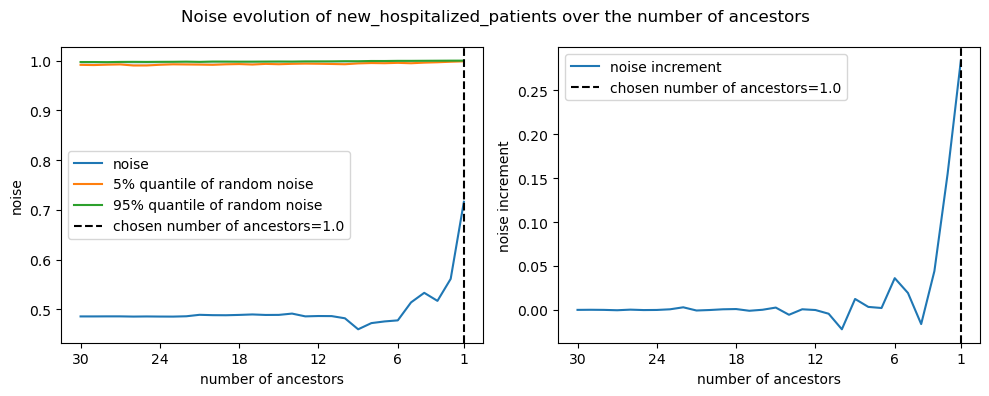

Ancestors of new_hospitalized_patients: ['new_intensive_care_patients']


Results for cumulative_hospitalized_patients
Kernel [linear] has n/(n+s)=0.11183317068587843, Z=(1.00, 1.00), gamma=4.21e-04
Kernel [quadratic] has n/(n+s)=0.4058377944430165, Z=(0.93, 0.96), gamma=9.95e-06
cumulative_hospitalized_patients has ancestors with the kernel [linear] | (n/(s+n)=0.33 after pruning)


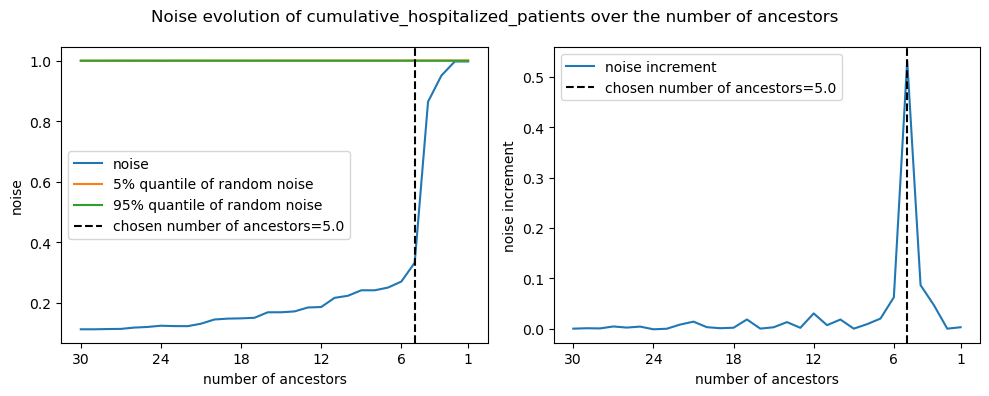

Ancestors of cumulative_hospitalized_patients: ['current_hospitalized_patients', 'cumulative_intensive_care_patients', 'new_recovered', 'cumulative_confirmed', 'cumulative_recovered']


Results for new_intensive_care_patients
Kernel [linear] has n/(n+s)=0.5525281185055428, Z=(0.99, 1.00), gamma=2.01e+01
Kernel [quadratic] has n/(n+s)=0.5811278379017384, Z=(0.96, 0.98), gamma=1.59e+00
new_intensive_care_patients has ancestors with the kernel [linear] | (n/(s+n)=0.72 after pruning)


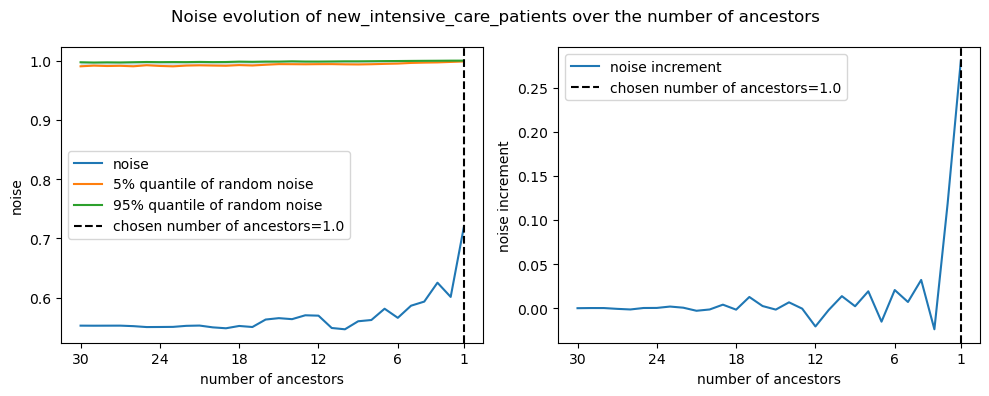

Ancestors of new_intensive_care_patients: ['new_hospitalized_patients']


Results for workplace_closing
Kernel [linear] has n/(n+s)=0.7476388282145454, Z=(0.99, 1.00), gamma=3.05e+01
Kernel [quadratic] has n/(n+s)=0.7631615431876356, Z=(0.94, 0.96), gamma=2.18e-02
workplace_closing has ancestors with the kernel [linear] | (n/(s+n)=0.77 after pruning)


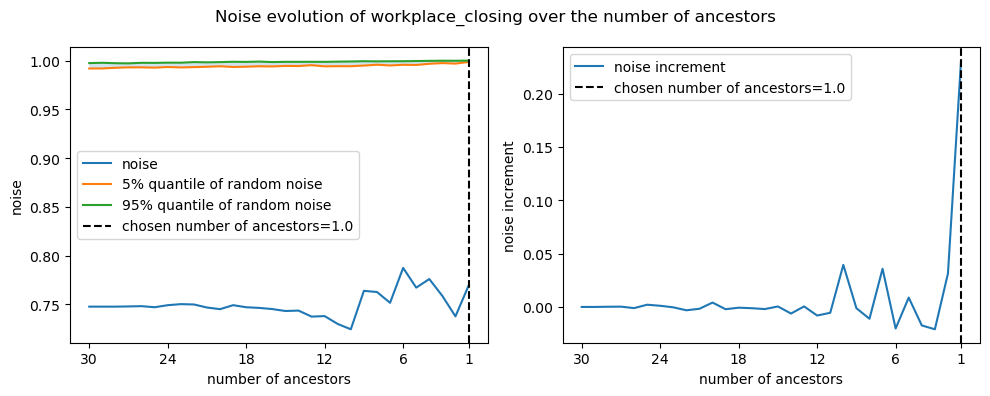

Ancestors of workplace_closing: ['restrictions_on_gatherings']


Results for facial_coverings
Kernel [linear] has n/(n+s)=0.7390420154388958, Z=(0.99, 1.00), gamma=3.54e+01
Kernel [quadratic] has n/(n+s)=0.7691215682854895, Z=(0.97, 0.98), gamma=2.49e+00
facial_coverings has ancestors with the kernel [linear] | (n/(s+n)=0.67 after pruning)


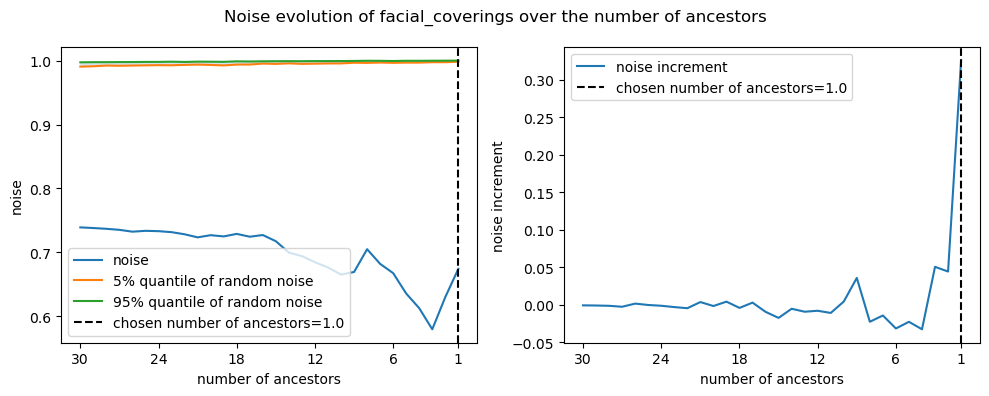

Ancestors of facial_coverings: ['stay_at_home_requirements']


Results for vaccination_policy
Kernel [linear] has n/(n+s)=0.5781448716809261, Z=(0.99, 1.00), gamma=1.67e+01
Kernel [quadratic] has n/(n+s)=0.7541867635962813, Z=(0.95, 0.97), gamma=3.00e-01
vaccination_policy has ancestors with the kernel [linear] | (n/(s+n)=0.69 after pruning)


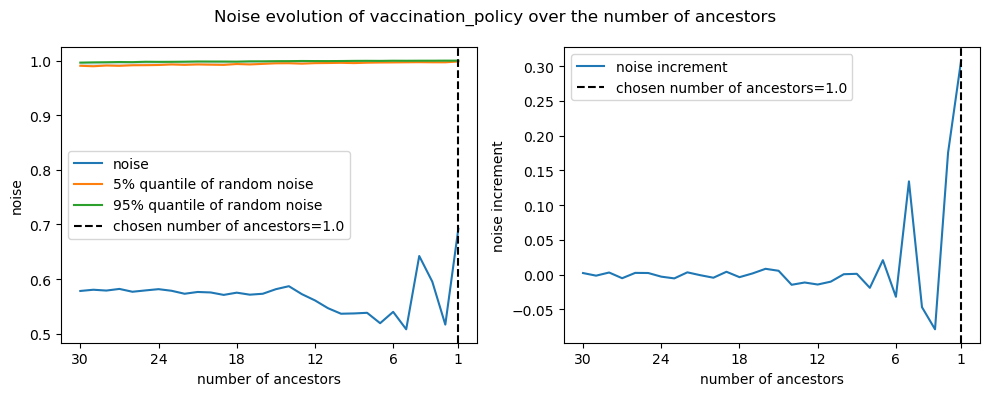

Ancestors of vaccination_policy: ['cumulative_persons_vaccinated']


Results for stringency_index
Kernel [linear] has n/(n+s)=0.23034515591498952, Z=(0.99, 1.00), gamma=4.50e-01
Kernel [quadratic] has n/(n+s)=0.7015723808122867, Z=(0.93, 0.96), gamma=1.39e-03
stringency_index has ancestors with the kernel [linear] | (n/(s+n)=0.66 after pruning)


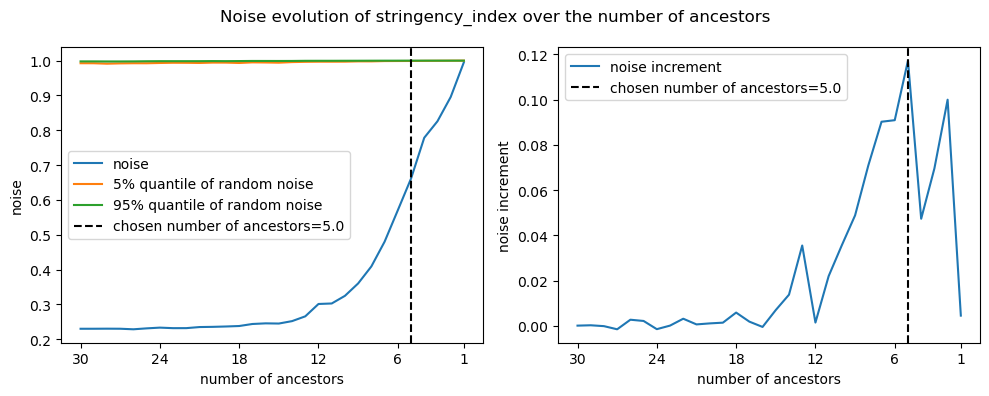

Ancestors of stringency_index: ['cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement']


Results for new_deceased
Kernel [linear] has n/(n+s)=0.6879917790417812, Z=(0.99, 1.00), gamma=8.05e+01
Kernel [quadratic] has n/(n+s)=0.8430832989365232, Z=(0.97, 0.98), gamma=3.05e+00
new_deceased has ancestors with the kernel [linear] | (n/(s+n)=0.79 after pruning)


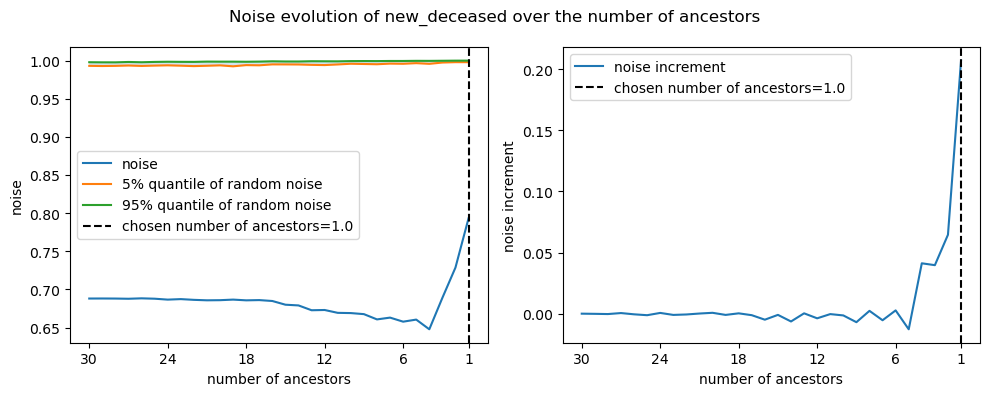

Ancestors of new_deceased: ['new_intensive_care_patients']


Results for new_recovered
Kernel [linear] has n/(n+s)=0.09146824100324585, Z=(1.00, 1.00), gamma=5.11e-04
Kernel [quadratic] has n/(n+s)=0.4085670552184527, Z=(0.93, 0.96), gamma=1.90e-05
new_recovered has ancestors with the kernel [linear] | (n/(s+n)=0.19 after pruning)


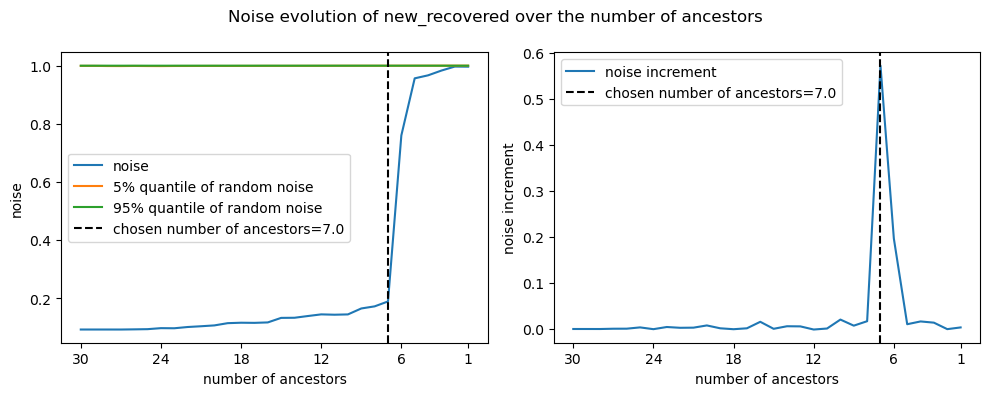

Ancestors of new_recovered: ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'cumulative_confirmed', 'cumulative_recovered', 'cumulative_persons_vaccinated', 'cumulative_vaccine_doses_administered']


Results for cumulative_deceased
Kernel [linear] has n/(n+s)=0.49275502109875985, Z=(0.99, 1.00), gamma=2.70e+00
Kernel [quadratic] has n/(n+s)=0.7513072755880418, Z=(0.94, 0.96), gamma=7.04e-02
cumulative_deceased has ancestors with the kernel [linear] | (n/(s+n)=0.34 after pruning)


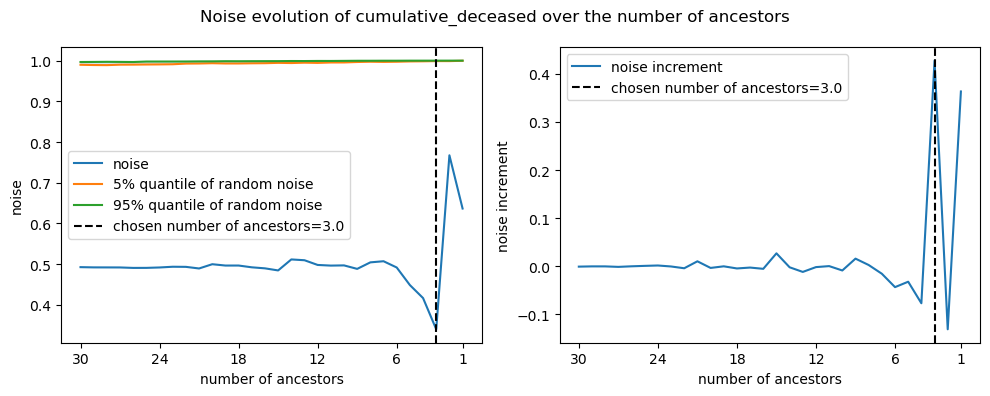

Ancestors of cumulative_deceased: ['cumulative_intensive_care_patients', 'new_recovered', 'cumulative_confirmed']


Results for cumulative_tested
Kernel [linear] has n/(n+s)=0.48378591606379634, Z=(0.99, 1.00), gamma=2.69e-01
Kernel [quadratic] has n/(n+s)=0.6363962544554717, Z=(0.93, 0.96), gamma=1.44e-04
cumulative_tested has ancestors with the kernel [linear] | (n/(s+n)=0.69 after pruning)


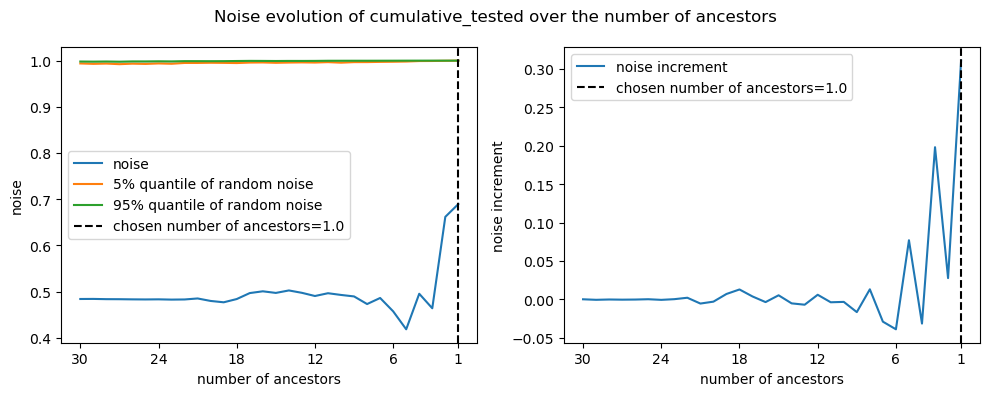

Ancestors of cumulative_tested: ['cumulative_recovered']


Results for new_persons_vaccinated
Kernel [linear] has n/(n+s)=9.815608946410347e-10, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.7556702892086738e-05, Z=(0.92, 0.96), gamma=1.00e-09
new_persons_vaccinated has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


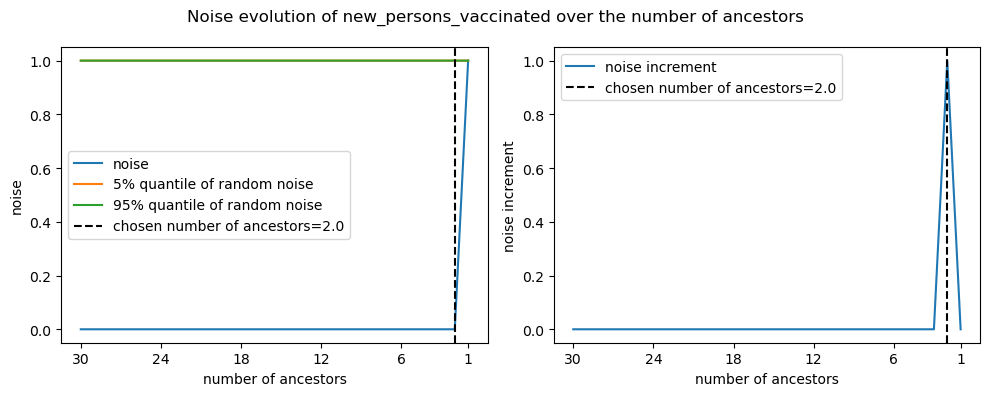

Ancestors of new_persons_vaccinated: ['new_persons_fully_vaccinated', 'new_vaccine_doses_administered']


Results for cumulative_persons_vaccinated
Kernel [linear] has n/(n+s)=3.1804578956913657e-07, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=0.02682378723892444, Z=(0.92, 0.96), gamma=1.00e-09
cumulative_persons_vaccinated has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


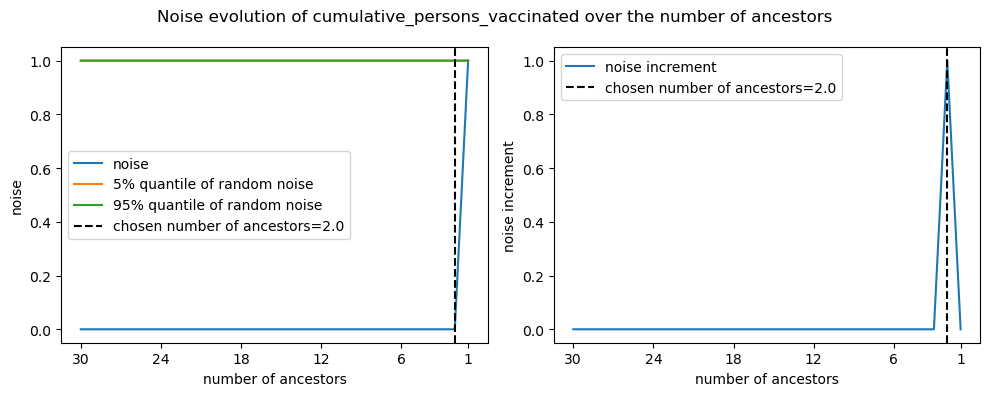

Ancestors of cumulative_persons_vaccinated: ['cumulative_persons_fully_vaccinated', 'cumulative_vaccine_doses_administered']


Results for new_persons_fully_vaccinated
Kernel [linear] has n/(n+s)=7.51917261068833e-10, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=7.237210105906112e-06, Z=(0.93, 0.96), gamma=1.00e-09
new_persons_fully_vaccinated has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


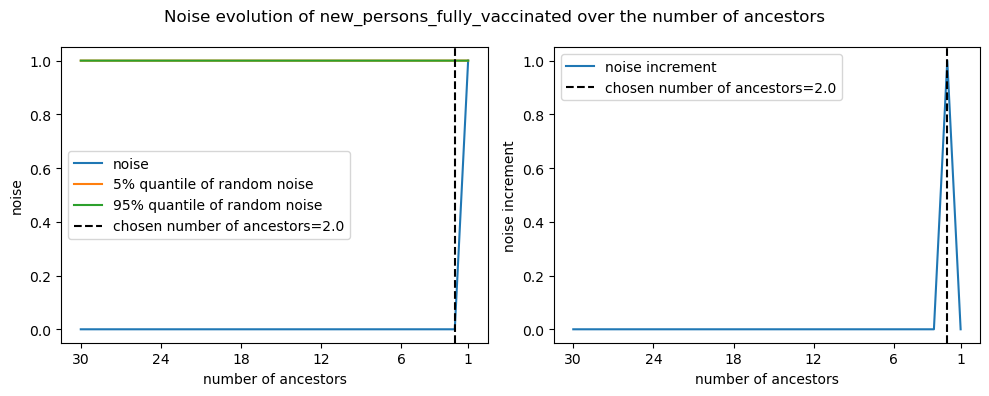

Ancestors of new_persons_fully_vaccinated: ['new_persons_vaccinated', 'new_vaccine_doses_administered']


Results for cumulative_persons_fully_vaccinated
Kernel [linear] has n/(n+s)=2.5142081204951727e-07, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=0.028107477591700483, Z=(0.93, 0.96), gamma=1.00e-09
cumulative_persons_fully_vaccinated has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


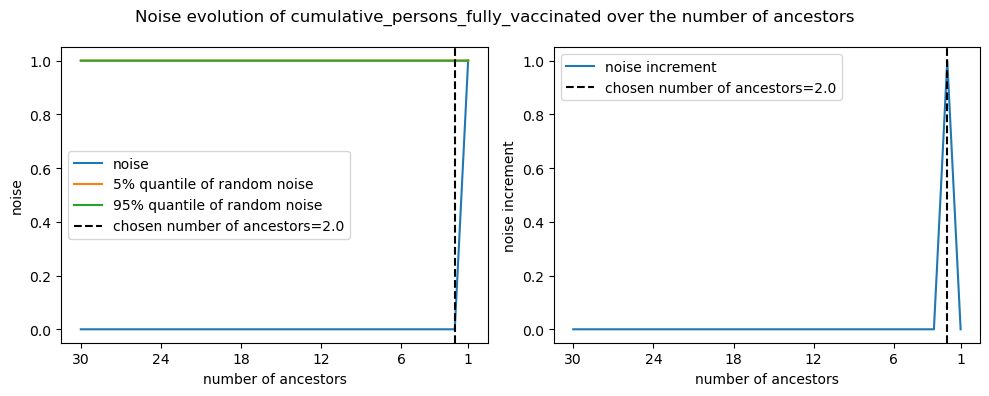

Ancestors of cumulative_persons_fully_vaccinated: ['cumulative_persons_vaccinated', 'cumulative_vaccine_doses_administered']


Results for new_vaccine_doses_administered
Kernel [linear] has n/(n+s)=8.477934378551658e-11, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=5.100793916641549e-07, Z=(0.92, 0.97), gamma=1.00e-09
new_vaccine_doses_administered has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


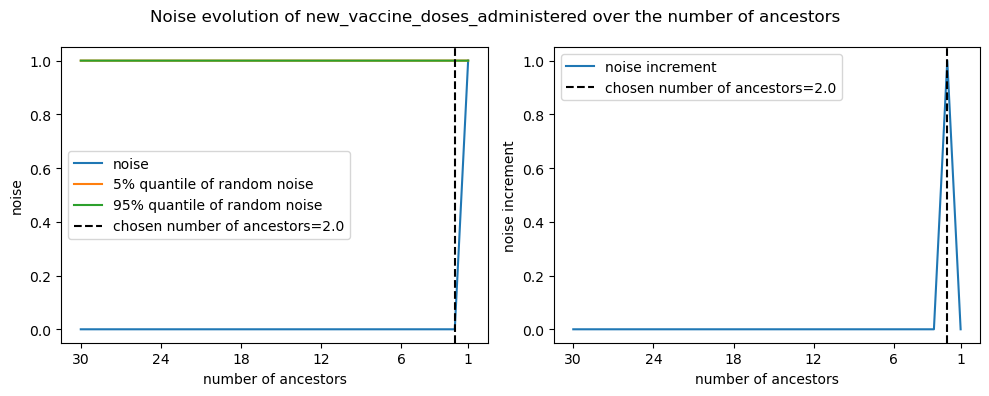

Ancestors of new_vaccine_doses_administered: ['new_persons_vaccinated', 'new_persons_fully_vaccinated']


Results for cumulative_vaccine_doses_administered
Kernel [linear] has n/(n+s)=4.3599012113774745e-09, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=0.005039805463699821, Z=(0.92, 0.96), gamma=1.00e-09
cumulative_vaccine_doses_administered has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


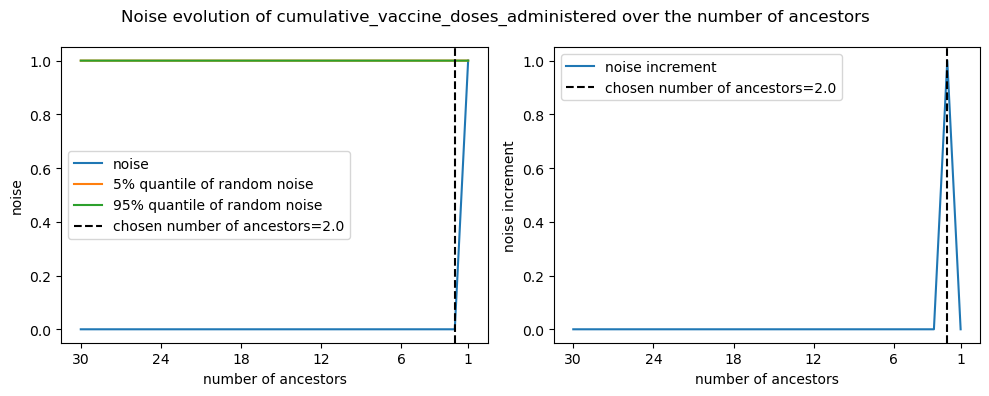

Ancestors of cumulative_vaccine_doses_administered: ['cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated']



Finding ancestors with kernel [quadratic]: 100%|██████████| 29/29 [00:05<00:00,  4.88it/s]



Results for current_hospitalized_patients
Kernel [linear] has n/(n+s)=0.6945735985328203, Z=(0.99, 1.00), gamma=1.38e-01
Kernel [quadratic] has n/(n+s)=0.5316168826048864, Z=(0.94, 0.96), gamma=5.67e-03
current_hospitalized_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.70 after pruning)


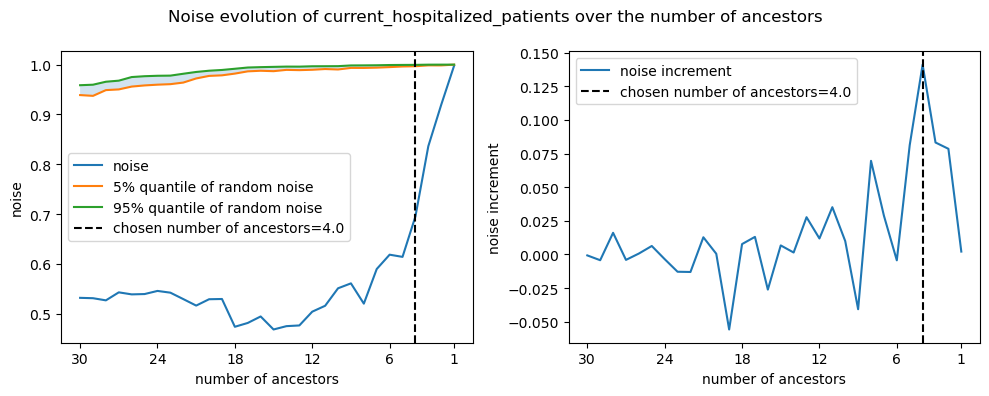

Ancestors of current_hospitalized_patients: ['cumulative_hospitalized_patients', 'current_intensive_care_patients', 'cumulative_deceased', 'cumulative_tested']


Results for cumulative_intensive_care_patients
Kernel [linear] has n/(n+s)=0.628955966642319, Z=(1.00, 1.00), gamma=2.45e-02
Kernel [quadratic] has n/(n+s)=0.48161962334147257, Z=(0.93, 0.96), gamma=3.28e-05
cumulative_intensive_care_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.63 after pruning)


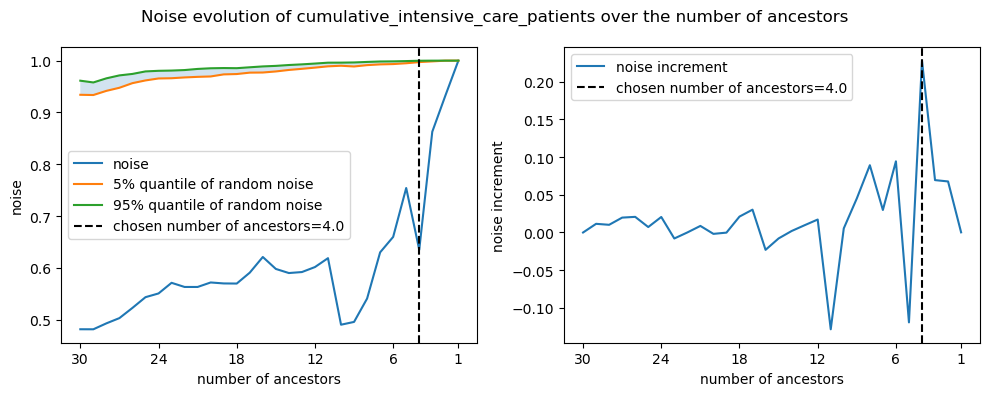

Ancestors of cumulative_intensive_care_patients: ['cumulative_hospitalized_patients', 'new_recovered', 'cumulative_tested', 'cumulative_persons_vaccinated']


Results for current_intensive_care_patients
Kernel [linear] has n/(n+s)=0.5745227494527723, Z=(0.99, 1.00), gamma=4.82e+00
Kernel [quadratic] has n/(n+s)=0.5460465706537305, Z=(0.94, 0.96), gamma=1.45e-02
current_intensive_care_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.69 after pruning)


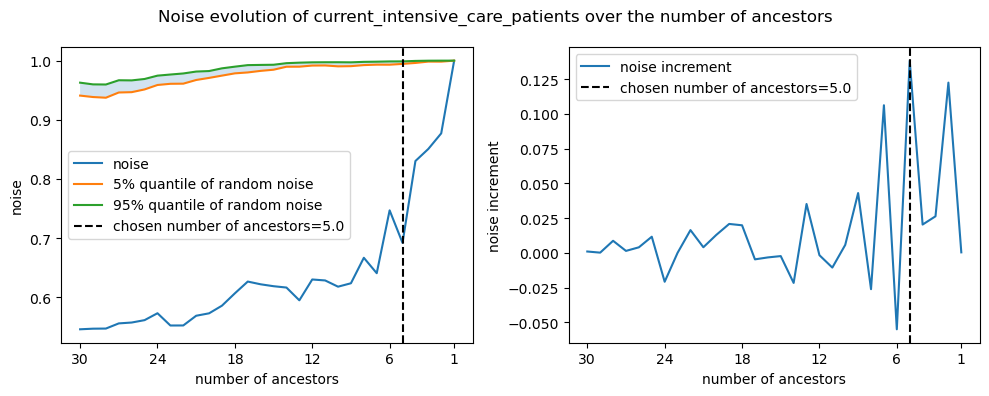

Ancestors of current_intensive_care_patients: ['current_hospitalized_patients', 'school_closing', 'stringency_index', 'cumulative_deceased', 'cumulative_tested']


Results for school_closing
Kernel [linear] has n/(n+s)=0.6379148544922985, Z=(0.99, 1.00), gamma=8.06e+00
Kernel [quadratic] has n/(n+s)=0.5706424961587987, Z=(0.93, 0.96), gamma=3.91e-06
school_closing has ancestors with the kernel [quadratic] | (n/(s+n)=0.60 after pruning)


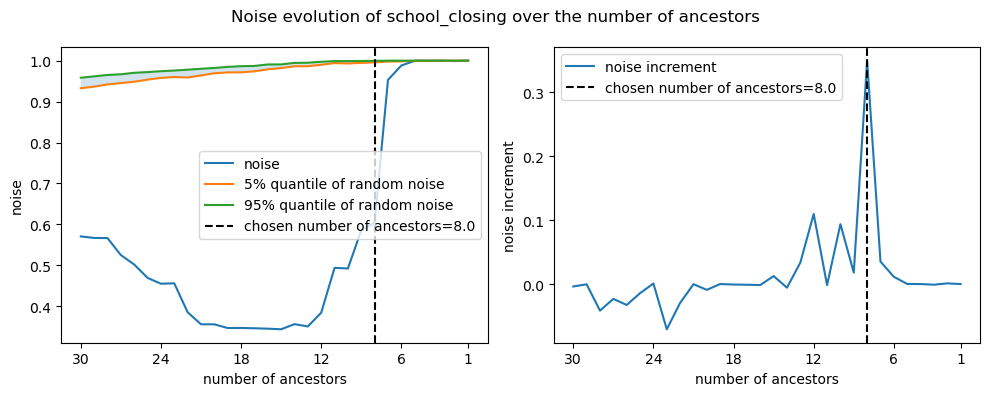

Ancestors of school_closing: ['workplace_closing', 'restrictions_on_gatherings', 'public_transport_closing', 'restrictions_on_internal_movement', 'vaccination_policy', 'stringency_index', 'cumulative_recovered', 'cumulative_tested']


Results for cancel_public_events
Kernel [linear] has n/(n+s)=0.649800938147583, Z=(0.99, 1.00), gamma=6.66e+00
Kernel [quadratic] has n/(n+s)=0.006159157780466513, Z=(0.94, 0.97), gamma=1.00e-09
cancel_public_events has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


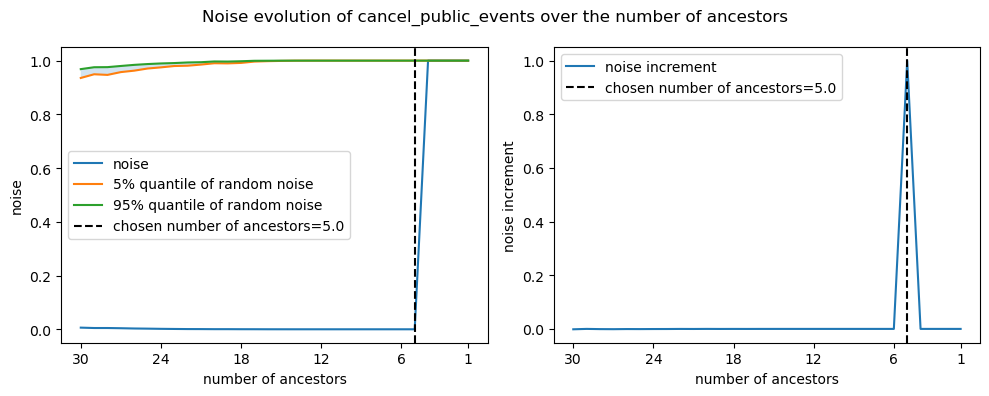

Ancestors of cancel_public_events: ['school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'income_support', 'vaccination_policy']


Results for restrictions_on_gatherings
Kernel [linear] has n/(n+s)=0.7181205942425922, Z=(0.99, 1.00), gamma=5.22e+00
Kernel [quadratic] has n/(n+s)=0.025267201946065874, Z=(0.93, 0.97), gamma=1.00e-09
restrictions_on_gatherings has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


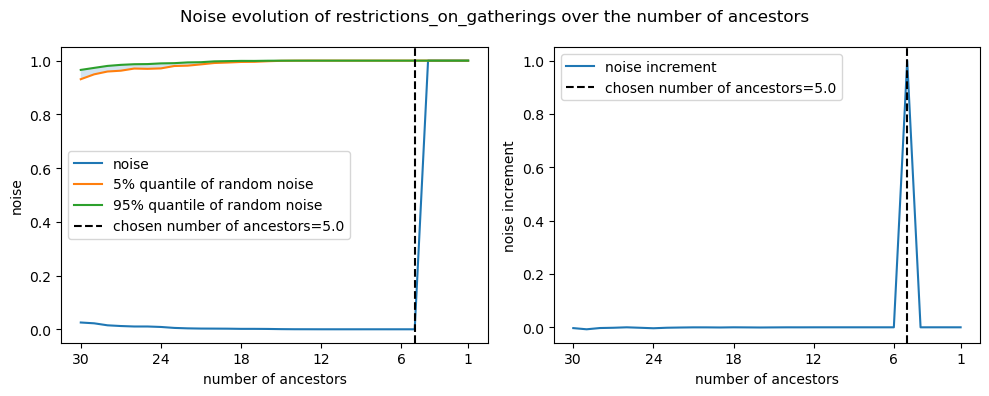

Ancestors of restrictions_on_gatherings: ['cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'stringency_index']


Results for public_transport_closing
Kernel [linear] has n/(n+s)=0.5456066004872223, Z=(0.99, 1.00), gamma=1.53e+00
Kernel [quadratic] has n/(n+s)=0.004500202071099576, Z=(0.93, 0.97), gamma=1.00e-09
public_transport_closing has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


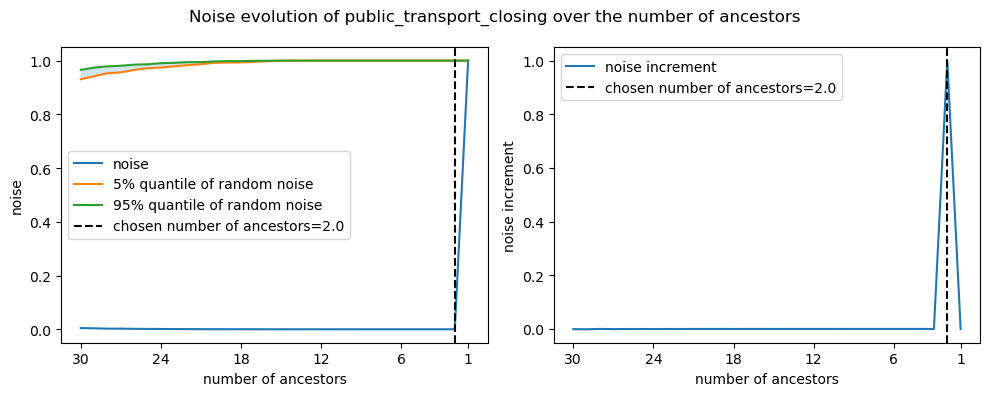

Ancestors of public_transport_closing: ['stay_at_home_requirements', 'restrictions_on_internal_movement']


Results for stay_at_home_requirements
Kernel [linear] has n/(n+s)=0.6280056090531079, Z=(0.99, 1.00), gamma=4.98e+00
Kernel [quadratic] has n/(n+s)=0.0021664401191196117, Z=(0.93, 0.97), gamma=1.00e-09
stay_at_home_requirements has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


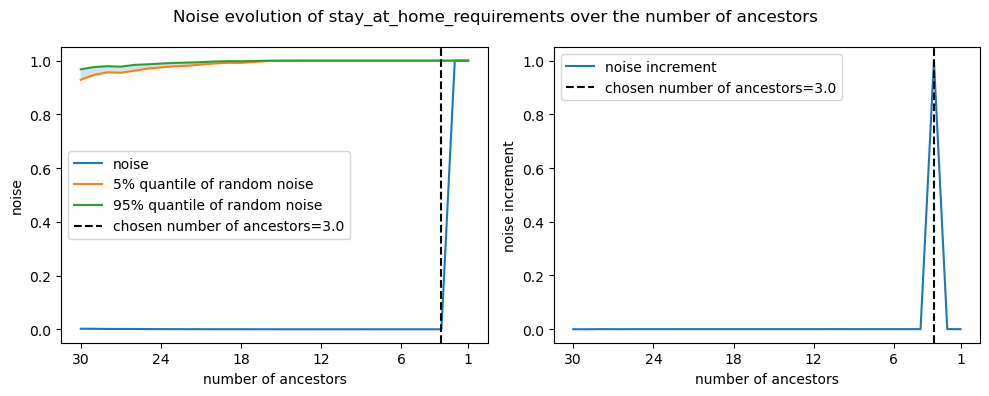

Ancestors of stay_at_home_requirements: ['cancel_public_events', 'restrictions_on_gatherings', 'stringency_index']


Results for restrictions_on_internal_movement
Kernel [linear] has n/(n+s)=0.6869526032825212, Z=(0.99, 1.00), gamma=7.20e+00
Kernel [quadratic] has n/(n+s)=0.3968768610995125, Z=(0.93, 0.96), gamma=1.84e-05
restrictions_on_internal_movement has ancestors with the kernel [quadratic] | (n/(s+n)=0.37 after pruning)


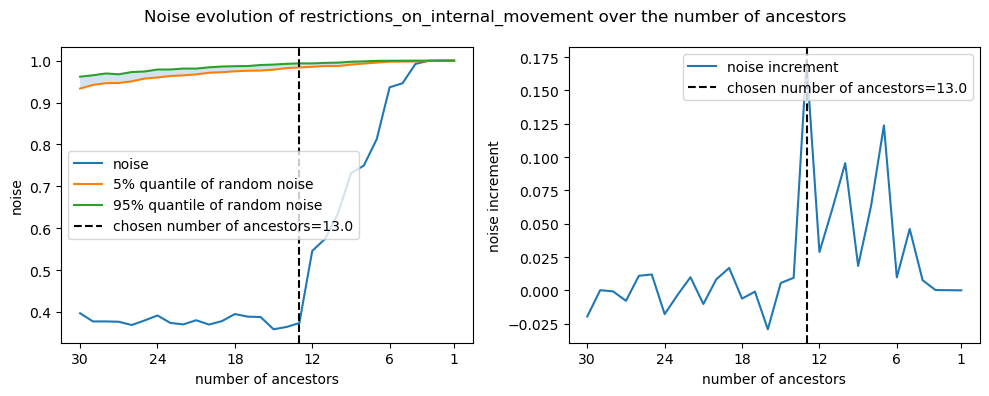

Ancestors of restrictions_on_internal_movement: ['cumulative_intensive_care_patients', 'school_closing', 'workplace_closing', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated']


Results for income_support
Kernel [linear] has n/(n+s)=0.7566657247376533, Z=(0.99, 1.00), gamma=5.83e+00
Kernel [quadratic] has n/(n+s)=0.012948643274520178, Z=(0.93, 0.97), gamma=1.00e-09
income_support has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


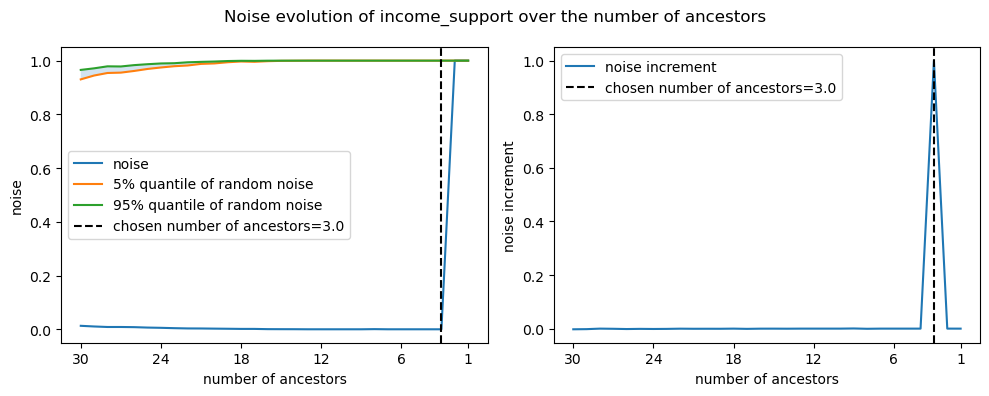

Ancestors of income_support: ['restrictions_on_gatherings', 'public_transport_closing', 'stringency_index']


Results for new_confirmed
Kernel [linear] has n/(n+s)=0.8119033135947016, Z=(0.99, 1.00), gamma=8.43e+01
Kernel [quadratic] has n/(n+s)=0.7425979715176841, Z=(0.97, 0.98), gamma=5.26e+00
new_confirmed has ancestors with the kernel [quadratic] | (n/(s+n)=0.92 after pruning)


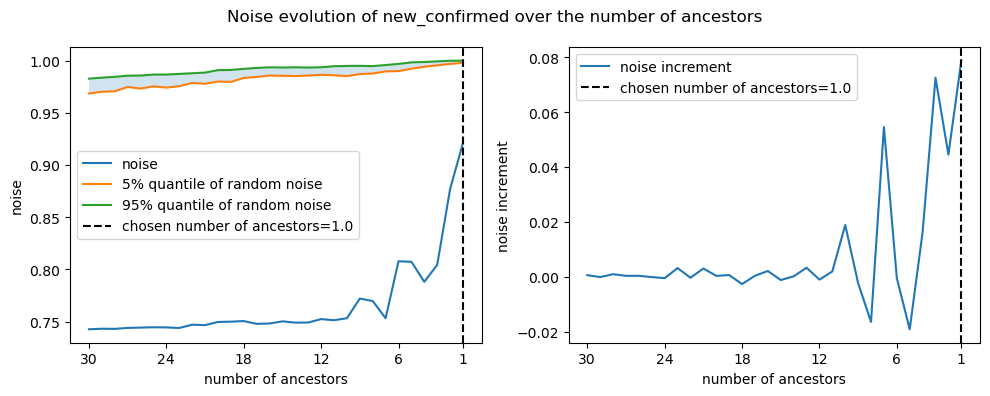

Ancestors of new_confirmed: ['new_hospitalized_patients']


Results for new_tested
Kernel [linear] has n/(n+s)=0.7527756161433585, Z=(0.99, 1.00), gamma=7.85e+01
Kernel [quadratic] has n/(n+s)=0.7000041517156247, Z=(0.97, 0.98), gamma=3.76e+00
new_tested has ancestors with the kernel [quadratic] | (n/(s+n)=0.78 after pruning)


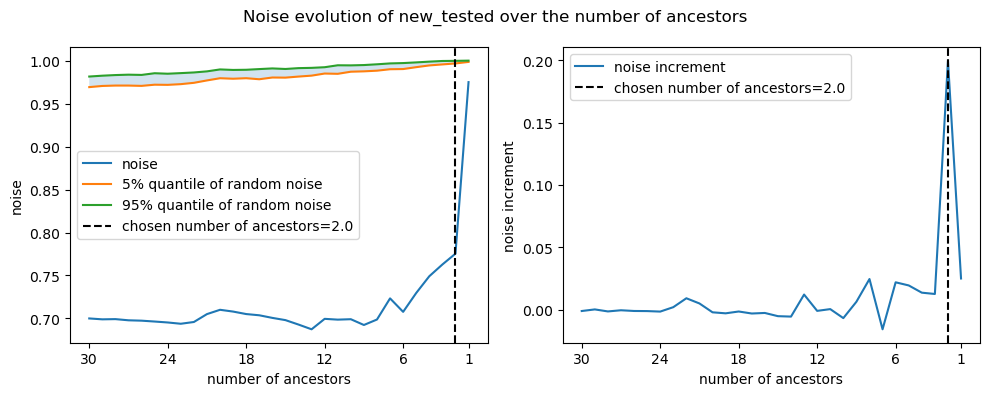

Ancestors of new_tested: ['new_hospitalized_patients', 'current_hospitalized_patients']


Results for cumulative_confirmed
Kernel [linear] has n/(n+s)=0.6132689728288768, Z=(0.99, 1.00), gamma=4.38e+00
Kernel [quadratic] has n/(n+s)=0.4045815795314504, Z=(0.94, 0.96), gamma=9.40e-04
cumulative_confirmed has ancestors with the kernel [quadratic] | (n/(s+n)=0.55 after pruning)


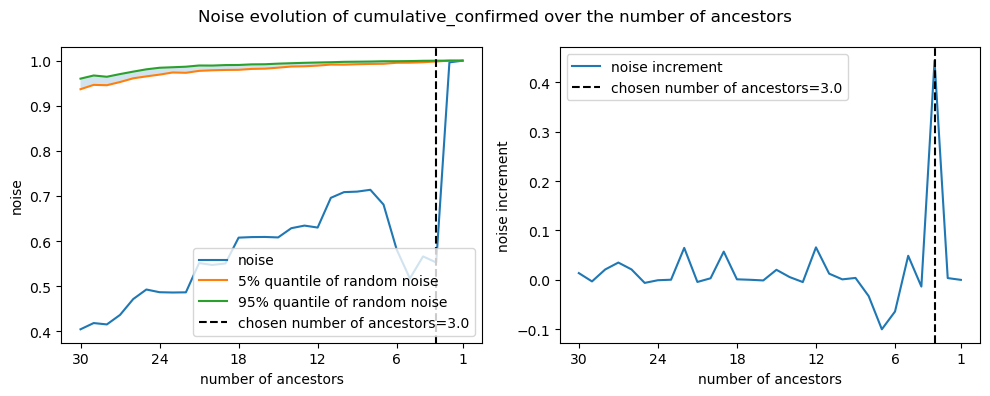

Ancestors of cumulative_confirmed: ['cumulative_hospitalized_patients', 'cumulative_intensive_care_patients', 'vaccination_policy']


Results for cumulative_recovered
Kernel [linear] has n/(n+s)=0.621199096358935, Z=(0.99, 1.00), gamma=4.26e-01
Kernel [quadratic] has n/(n+s)=0.5472525377133309, Z=(0.94, 0.96), gamma=4.14e-04
cumulative_recovered has ancestors with the kernel [quadratic] | (n/(s+n)=0.69 after pruning)


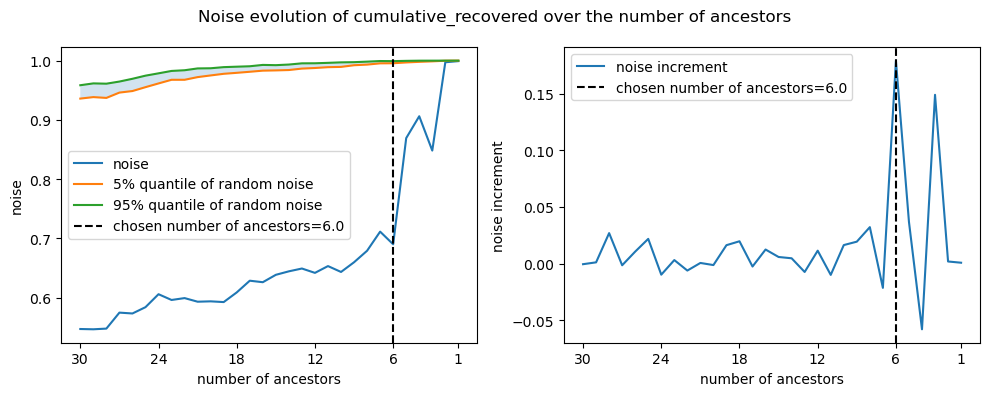

Ancestors of cumulative_recovered: ['current_hospitalized_patients', 'current_intensive_care_patients', 'public_transport_closing', 'income_support', 'new_recovered', 'cumulative_tested']



In [6]:
graph_discovery.fit()

In [7]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

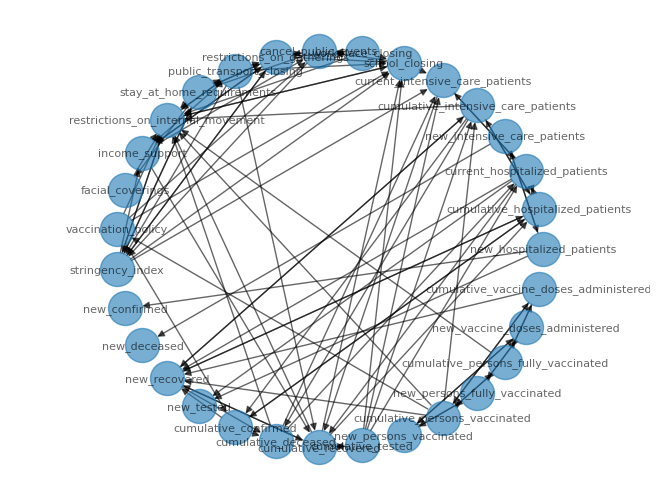

In [8]:
plot_a_network(graph_discovery.G,False)

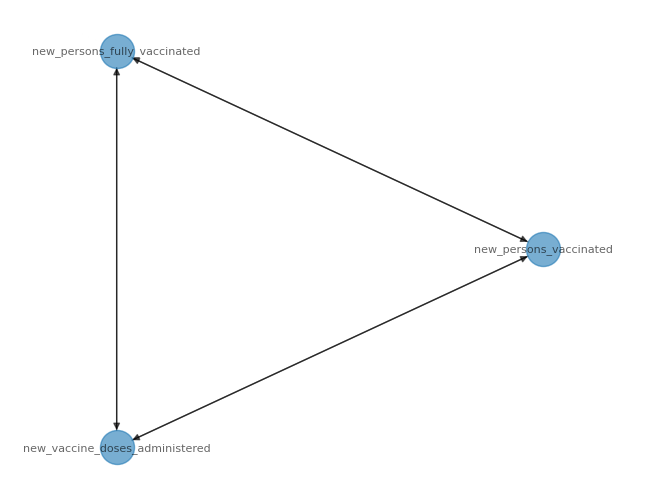

In [9]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_persons_fully_vaccinated',undirected=False,radius=2).reverse())

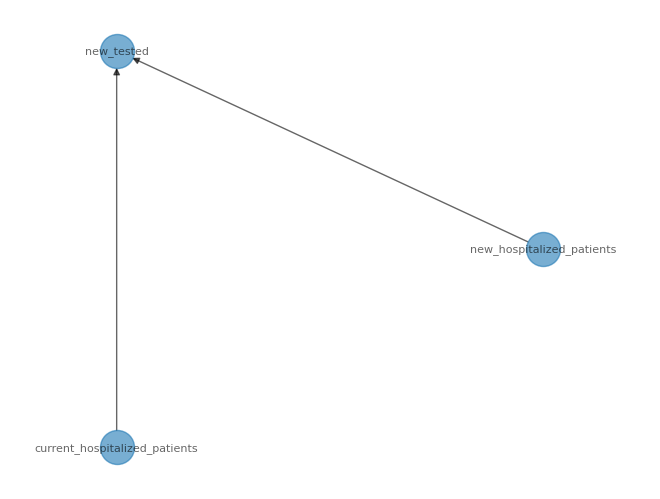

In [10]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_tested',undirected=False,radius=1).reverse(),False)

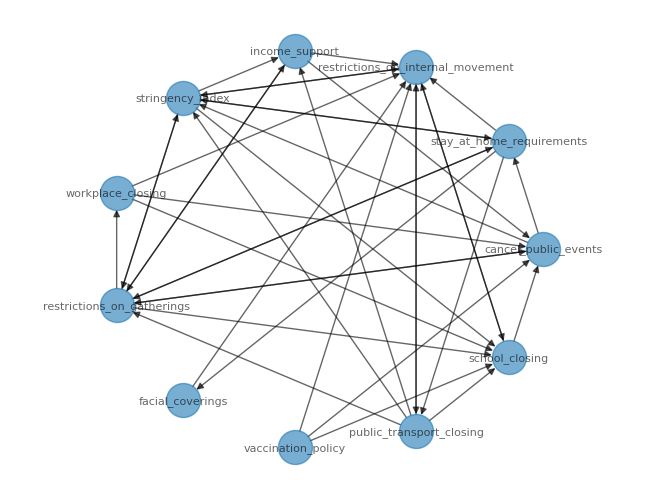

In [11]:
G_gov=graph_discovery.G.subgraph([
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index'])
plot_a_network(G_gov,False)

# Delete redundant information

In [12]:
reduced_names = ['new_hospitalized_patients',
 'current_hospitalized_patients',
 'stay_at_home_requirements',
 'new_confirmed',
 'new_deceased',
 'new_recovered',
 'new_tested',
 'new_persons_vaccinated']
df_reduced=df[reduced_names]

Finding ancestors with kernel [quadratic]: 100%|██████████| 6/6 [00:01<00:00,  4.24it/s]



Results for new_hospitalized_patients
Kernel [linear] has n/(n+s)=0.5398152379214287, Z=(0.99, 1.00), gamma=5.87e+01
Kernel [quadratic] has n/(n+s)=0.5347840701797996, Z=(0.99, 1.00), gamma=2.21e+01
Kernel [gaussian] has n/(n+s)=0.741565064326133, Z=(0.83, 0.87), gamma=1.91e-04
new_hospitalized_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.74 after pruning)


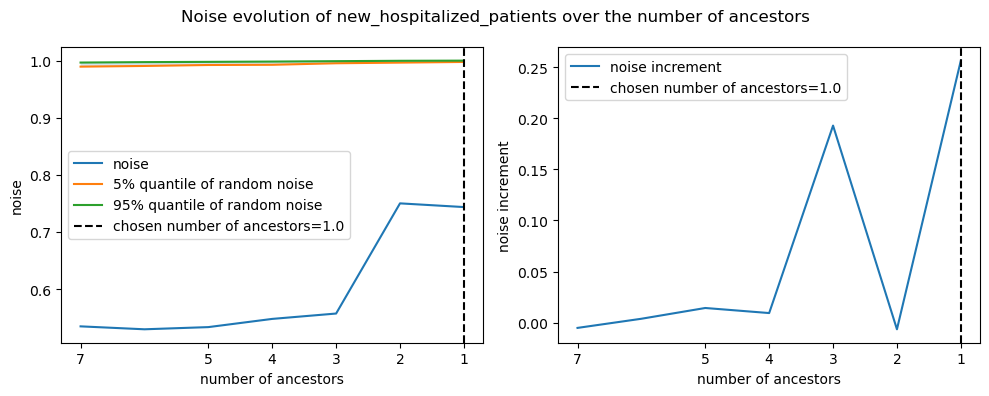

Ancestors of new_hospitalized_patients: ['new_deceased']


Results for current_hospitalized_patients
Kernel [linear] has n/(n+s)=0.6493635902760578, Z=(1.00, 1.00), gamma=6.62e+01
Kernel [quadratic] has n/(n+s)=0.5307980526689714, Z=(0.99, 1.00), gamma=2.70e+01
Kernel [gaussian] has n/(n+s)=0.5419809801236714, Z=(0.82, 0.87), gamma=2.78e-04
current_hospitalized_patients has ancestors with the kernel [quadratic] | (n/(s+n)=0.78 after pruning)


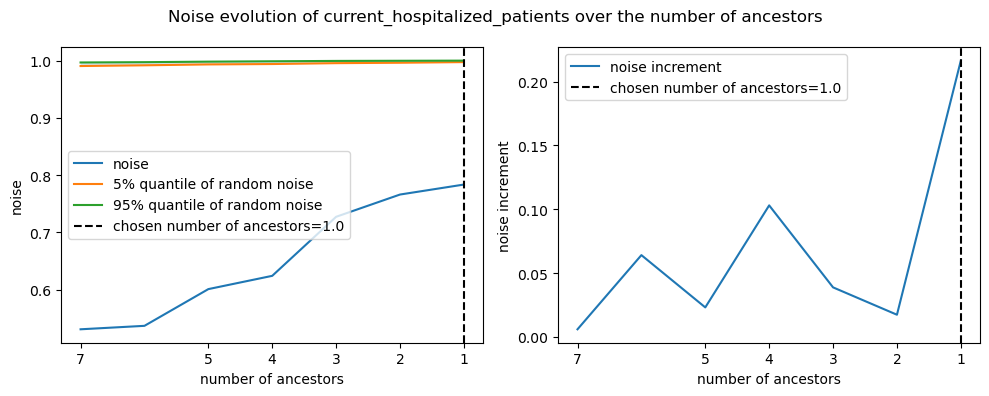

Ancestors of current_hospitalized_patients: ['new_deceased']


Results for stay_at_home_requirements
Kernel [linear] has n/(n+s)=0.5936561349862213, Z=(0.99, 1.00), gamma=6.21e+01
Kernel [quadratic] has n/(n+s)=0.49559167479735733, Z=(0.99, 1.00), gamma=2.66e+01
Kernel [gaussian] has n/(n+s)=0.8278613710068943, Z=(0.81, 0.86), gamma=5.30e-04
stay_at_home_requirements has ancestors with the kernel [quadratic] | (n/(s+n)=0.76 after pruning)


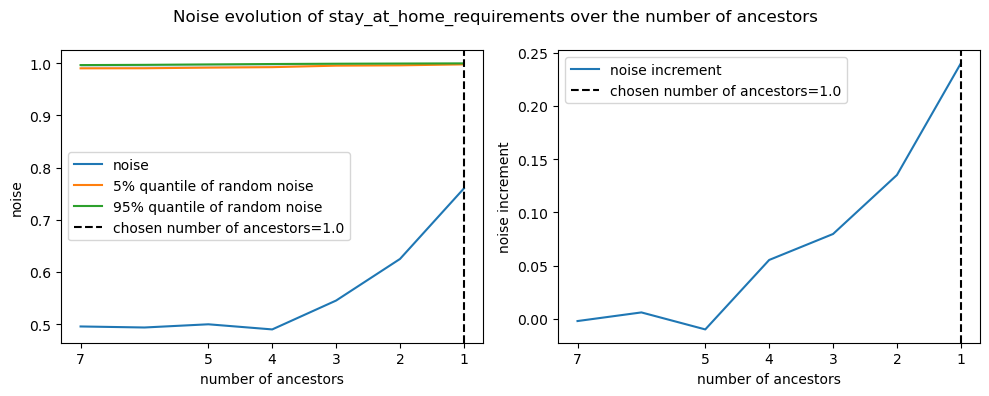

Ancestors of stay_at_home_requirements: ['new_recovered']


Results for new_deceased
Kernel [linear] has n/(n+s)=0.691945108513462, Z=(0.99, 1.00), gamma=9.73e+01
Kernel [quadratic] has n/(n+s)=0.6597343381269323, Z=(0.99, 1.00), gamma=7.13e+01
Kernel [gaussian] has n/(n+s)=0.7419434173257268, Z=(0.83, 0.87), gamma=1.61e-04
new_deceased has ancestors with the kernel [quadratic] | (n/(s+n)=0.80 after pruning)


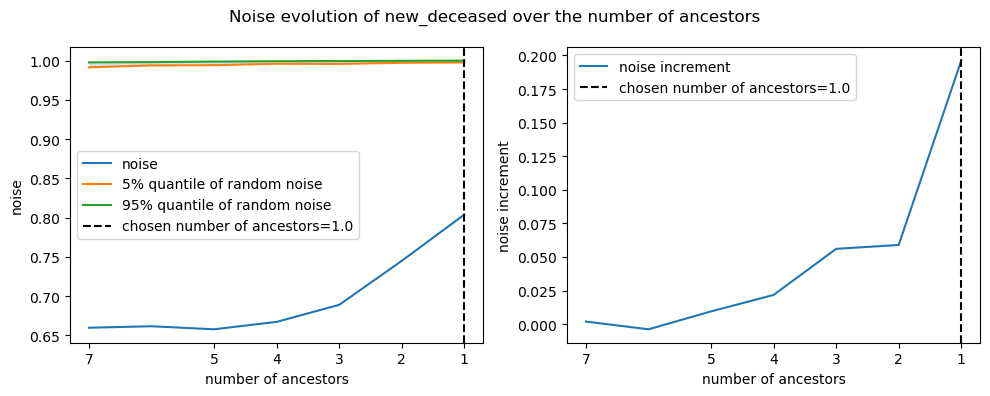

Ancestors of new_deceased: ['new_hospitalized_patients']


Results for new_recovered
Kernel [linear] has n/(n+s)=0.8066990216507125, Z=(1.00, 1.00), gamma=1.15e+02
Kernel [quadratic] has n/(n+s)=0.6092199938487484, Z=(0.99, 1.00), gamma=2.88e+01
Kernel [gaussian] has n/(n+s)=0.6912941827440875, Z=(0.82, 0.86), gamma=3.66e-04
new_recovered has ancestors with the kernel [quadratic] | (n/(s+n)=0.79 after pruning)


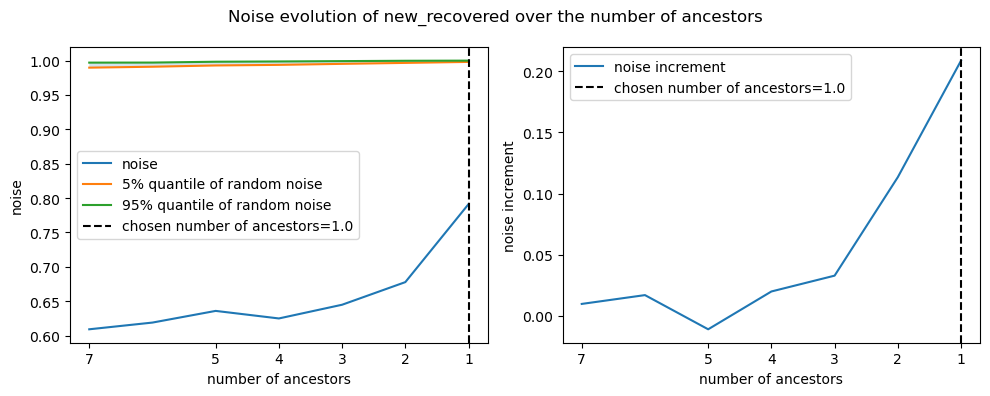

Ancestors of new_recovered: ['stay_at_home_requirements']



Finding ancestors with kernel [gaussian]: 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]



Results for new_confirmed
Kernel [linear] has n/(n+s)=0.8338940387088419, Z=(1.00, 1.00), gamma=1.78e+02
Kernel [quadratic] has n/(n+s)=0.7332399642309195, Z=(0.99, 1.00), gamma=7.34e+01
Kernel [gaussian] has n/(n+s)=0.6001335099779616, Z=(0.82, 0.86), gamma=2.68e-04
new_confirmed has ancestors with the kernel [gaussian] | (n/(s+n)=0.69 after pruning)


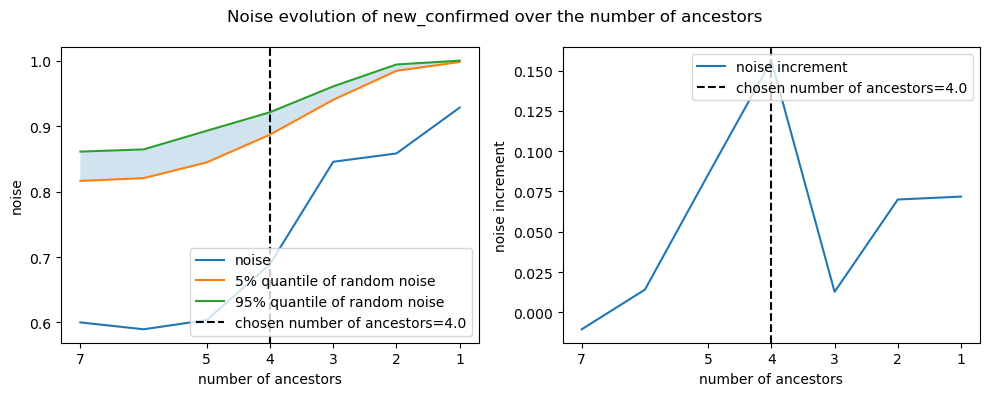

Ancestors of new_confirmed: ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_recovered', 'new_tested']


Results for new_tested
Kernel [linear] has n/(n+s)=0.8885931295280404, Z=(0.99, 1.00), gamma=1.72e+02
Kernel [quadratic] has n/(n+s)=0.824268533343737, Z=(0.99, 1.00), gamma=7.01e+01
Kernel [gaussian] has n/(n+s)=0.7666535033858635, Z=(0.83, 0.87), gamma=1.60e-04
new_tested has ancestors with the kernel [gaussian] | (n/(s+n)=0.77 after pruning)


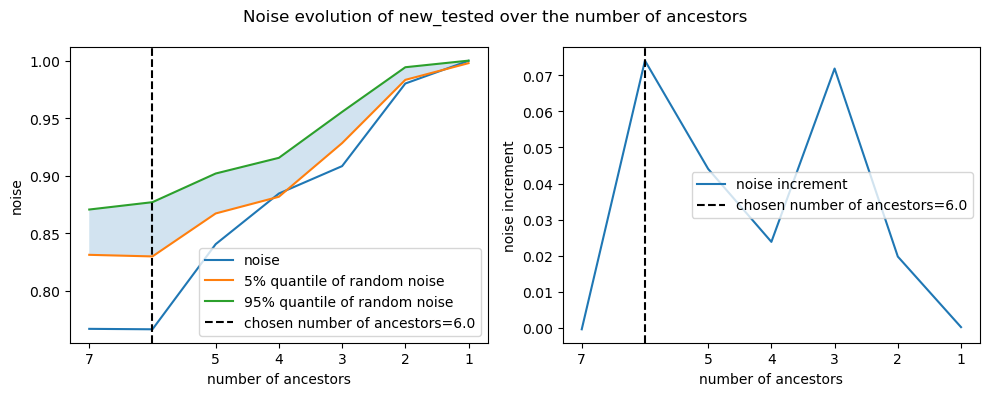

Ancestors of new_tested: ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_persons_vaccinated']


Results for new_persons_vaccinated
Kernel [linear] has n/(n+s)=0.9548267572765015, Z=(1.00, 1.00), gamma=3.03e+02
Kernel [quadratic] has n/(n+s)=0.8963967675844103, Z=(0.99, 1.00), gamma=6.98e+01
Kernel [gaussian] has n/(n+s)=0.7979571983368132, Z=(0.84, 0.88), gamma=1.59e-04
new_persons_vaccinated has ancestors with the kernel [gaussian] | (n/(s+n)=0.91 after pruning)


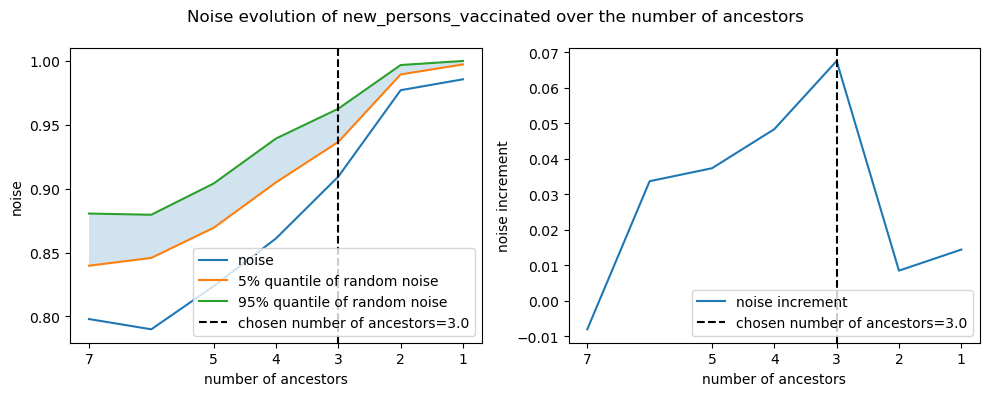

Ancestors of new_persons_vaccinated: ['current_hospitalized_patients', 'new_recovered', 'new_tested']



In [17]:

graph_discovery_reduced=CHD.GraphDiscovery.from_dataframe(df_reduced,normalize=True,kernels=[0.1*LinearMode(),0.01*QuadraticMode(),0.001*GaussianMode(l=1)])
graph_discovery_reduced.fit()

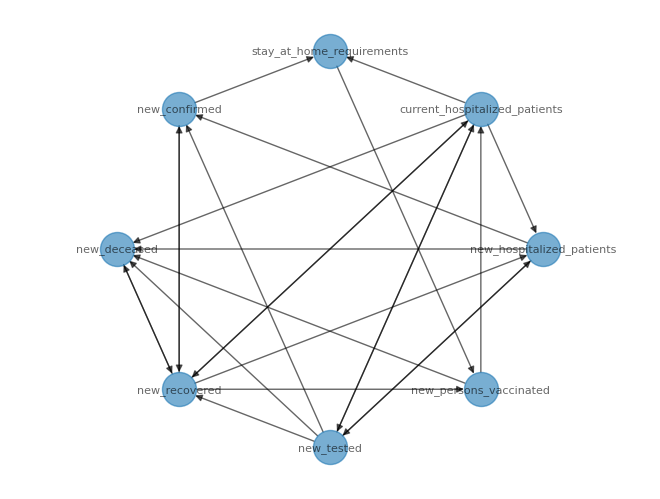

In [ ]:
plot_a_network(graph_discovery_reduced.G,False)